Tall (T) or Wide (W)


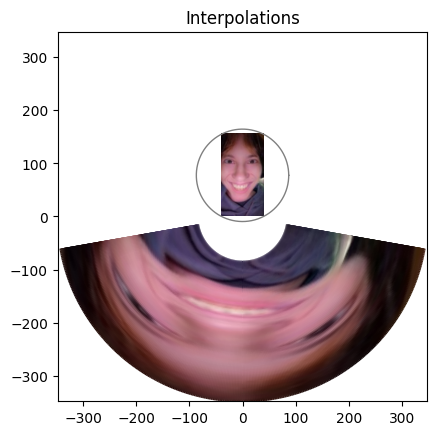

1.8347673416137695


In [ ]:
import numpy as np
from random import *
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from math import isqrt
from time import *
def zinput(prompt):
    print(prompt)
    return "T"
choice = zinput("Tall (T) or Wide (W)")
while choice.upper() != "T" and choice.upper() != "W":
    choice = zinput("Tall (T) or Wide (W)")
if choice.upper() == "T":
    ella_hugo_BOSS_ulbrich = randint(1,22)
    if ella_hugo_BOSS_ulbrich == 7:
        image = "Tall2.jpg"
        #Thales: 80 wide, 134 high
    else:
        image = "Tall1.jpg"
        #Ella: 80 wide, 155 high
else:
    image = "aWide.jpg"
    #164 wide, 80 high#
start=time()

def generate_circle(center_x, center_y, radius, num_points=2000):
    theta = np.linspace(0, 2 * np.pi, num_points)
    x = center_x + radius * np.cos(theta)
    y = center_y + radius * np.sin(theta)
    return x, y

def generate_arc(center_x, center_y, radius, angle, image_row, num_points=300):
    """
    Generates an arc between angles:
       270-angle/2 and 270+angle/2 (in degrees)
    and linearly interpolates the colours from the row 'image_row'
    of the global image in a vectorized way.

    Returns:
      x, y: arc coordinates.
      arc_colors: an array of shape (num_points, channels) with interpolated colours.
    """
    global image  # The image loaded later is used here.
    # Convert the start and end angles from degrees to radians
    global canvas
    start_angle = np.deg2rad(270 - angle/2)
    end_angle = np.deg2rad(270 + angle/2)
    theta = np.linspace(start_angle, end_angle, num_points)

    x = center_x + radius * np.cos(theta)
    y = center_y + radius * np.sin(theta)

    col_indices = (theta-start_angle)*image_width/(end_angle-start_angle)

    image_row = int(image_row)
    row_data = image[image_row, :, :]  # shape: (image_width, channels)

    num_channels = row_data.shape[1]
    arc_colors = np.empty((num_points, num_channels), dtype=row_data.dtype)
    cols = np.arange(image_width)
    for ch in range(num_channels):
        arc_colors[:, ch] = np.interp(col_indices, cols, row_data[:, ch])
    return x,y, arc_colors/255
  # Load the image
image = plt.imread(image)
image_height = image.shape[0]
image_width = image.shape[1]

# Define parameters based on the image size
circle_radius = isqrt(int((image_width/2)**2 + (image_height/2)**2))
# This "circle_radius_in_pixels" variable is assumed to be defined.
# For this example, we set it to 1. Adjust as you see fit.
R_f = 3
canvas_size = circle_radius * (int(2*R_f+2))
canvas = np.zeros((canvas_size, canvas_size, image.shape[2]), dtype=np.uint8)
canvas += 255

# Setup the plot:
fig, ax = plt.subplots()
ax.imshow(canvas, extent=(-canvas_size/2, canvas_size/2, -canvas_size/2, canvas_size/2))
# Draw the image with its extent positioned so that the image's center is at x=0
ax.imshow(image, extent=(-image_width/2, image_width/2, 0, image_height))

# Draw a circle outline for context (e.g., using generate_circle)
first_circle_x, first_circle_y = generate_circle(0, image_height/2, circle_radius)
ax.plot(first_circle_x, first_circle_y, color='gray', lw=1, label="Circle")

arc_angle = 160  # degrees
for row in range(image_height):
    R_here = R_f*((image_height-row-1)/image_height)+1
    arc_x, arc_y, arc_colors = generate_arc(0, 0, circle_radius*R_here, arc_angle, row)
    points = np.array([arc_x, arc_y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, colors=arc_colors[:-1], linewidth=3)
    ax.add_collection(lc)

ax.set_xlim(-canvas_size/2, canvas_size/2)
ax.set_ylim(-canvas_size/2, canvas_size/2)
ax.set_title("Interpolations")
ax.axis('on')
#ax.grid('on')
plt.show()
print(time()-start)

In [ ]:
#interactive:


In [1]:
%matplotlib inline
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from math import isqrt
from time import perf_counter
import ipywidgets as widgets
from ipywidgets import interact

# --- Task 10 Image Selection ---
# The original code sets the image to "sybil.jpg.jpg"; you can adjust this as needed.
image_file = "aWide.jpg"
image = plt.imread(image_file)
image_height = image.shape[0]
image_width = image.shape[1]

def generate_circle(center_x, center_y, radius, num_points=2000):
    theta = np.linspace(0, 2 * np.pi, num_points)
    x = center_x + radius * np.cos(theta)
    y = center_y + radius * np.sin(theta)
    return x, y

def generate_arc(center_x, center_y, radius, angle, image_row, num_points=300):
    """
    Generates an arc between angles (in degrees) 270-angle/2 to 270+angle/2
    and linearly interpolates colours from the given row of the global image.
    """
    start_angle = np.deg2rad(270 - angle/2)
    end_angle = np.deg2rad(270 + angle/2)
    theta = np.linspace(start_angle, end_angle, num_points)

    x = center_x + radius * np.cos(theta)
    y = center_y + radius * np.sin(theta)

    col_indices = (theta - start_angle) * image_width / (end_angle - start_angle)

    image_row = int(image_row)
    row_data = image[image_row, :, :]  # shape: (image_width, channels)
    num_channels = row_data.shape[1]
    arc_colors = np.empty((num_points, num_channels), dtype=row_data.dtype)
    cols = np.arange(image_width)
    for ch in range(num_channels):
        arc_colors[:, ch] = np.interp(col_indices, cols, row_data[:, ch])
    return x, y, arc_colors/255

def update_task10(arc_center_x, arc_center_y):
    t0 = perf_counter()
    # Compute the circle radius based on image dimensions.
    circle_radius = isqrt(int((image_width/2)**2 + (image_height/2)**2))
    R_f = 3
    canvas_size = circle_radius * (int(2*R_f+2))
    canvas = np.full((canvas_size, canvas_size, image.shape[2]), 255, dtype=np.uint8)

    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(canvas, extent=[-canvas_size/2, canvas_size/2, -canvas_size/2, canvas_size/2])
    ax.imshow(image, extent=[-image_width/2, image_width/2, 0, image_height])

    # Draw a circle outline for context.
    # Here we adjust the circle’s center using the interactive sliders:
    circle_x, circle_y = generate_circle(arc_center_x, (image_height/2) + arc_center_y, circle_radius)
    ax.plot(circle_x, circle_y, color='gray', lw=1, label="Circle")

    arc_angle = 160  # degrees
    # For each row in the image, generate an arc.
    for row in range(image_height):
        R_here = R_f * ((image_height - row - 1) / image_height) + 1
        arc_x, arc_y, arc_colors = generate_arc(arc_center_x, arc_center_y, circle_radius * R_here, arc_angle, row)
        points = np.array([arc_x, arc_y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, colors=arc_colors[:-1], linewidth=3)
        ax.add_collection(lc)

    ax.set_xlim(-canvas_size/2, canvas_size/2)
    ax.set_ylim(-canvas_size/2, canvas_size/2)
    ax.set_title(f"Task 10: Arc Center = ({arc_center_x}, {arc_center_y})")
    ax.axis('on')
    plt.show()

    t_elapsed = perf_counter() - t0
    print("Task 10 processing time: {:.4f} seconds".format(t_elapsed))

# Define slider ranges – here roughly from -half image dimensions to +half.
slider_range_x = (-int(image_width/2), int(image_width/2))
slider_range_y = (-int(image_height/2), int(image_height/2))

interact(update_task10,
         arc_center_x=widgets.IntSlider(min=slider_range_x[0], max=slider_range_x[1], step=1, value=0, description="Center X"),
         arc_center_y=widgets.IntSlider(min=slider_range_y[0], max=slider_range_y[1], step=1, value=0, description="Center Y"));

FileNotFoundError: [Errno 2] No such file or directory: 'aWide.jpg'